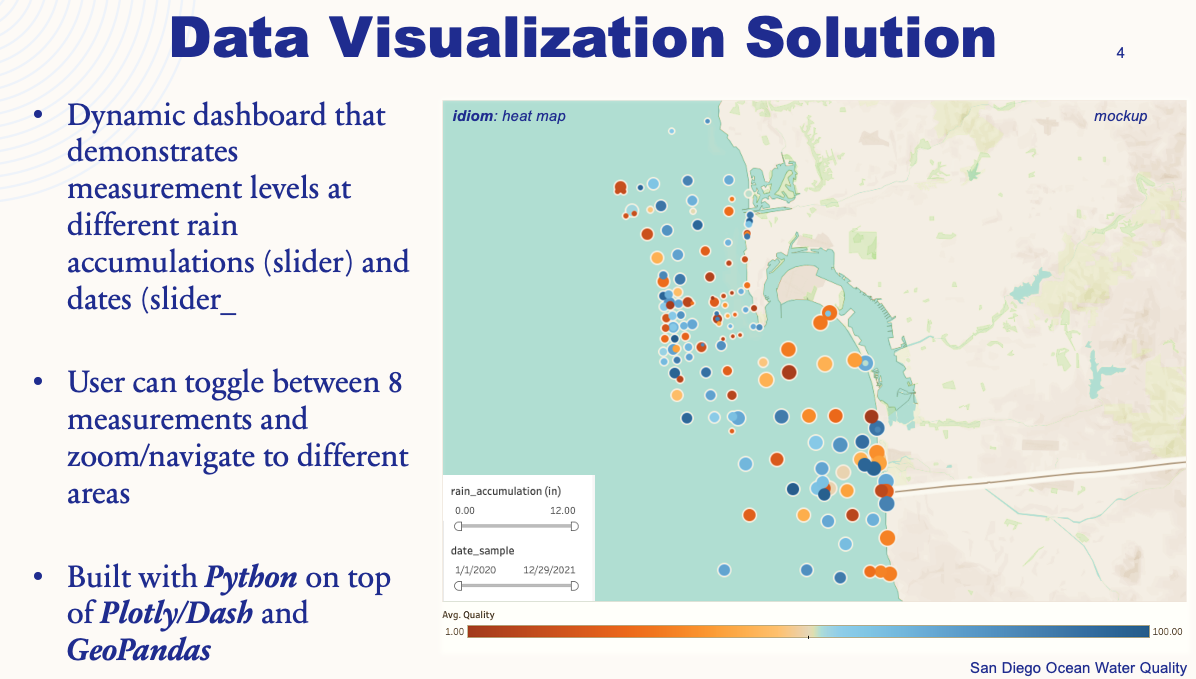

Data source: https://data.sandiego.gov/datasets/monitoring-ocean-water-quality/

GeoPandas - plot lat/lon: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972 

In [ ]:
# %pip install plotly

In [ ]:
# %pip install dash

In [ ]:
# %pip install jupyter-dash

In [1]:
from dash import Dash, html, dcc, Input, Output
from jupyter_dash import JupyterDash
import plotly.express as px
import plotly.graph_objects as go

from urllib.request import urlopen
import json
import webbrowser

import os
import pandas as pd
import matplotlib.pyplot as plt
#import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon, mapping

# polygon / coastline data

In [2]:
coastline = gpd.read_file("./data/polygons/COASTLINE/coast.shp")
coastline

,SD,geometry
0,0,"LINESTRING (5500000.000 2474777.809, 5500052.0..."
1,1,"MULTILINESTRING ((6150763.738 2087133.852, 615..."
2,0,"MULTILINESTRING ((6292062.995 1775304.125, 629..."


In [3]:
coastline_lat_long = coastline.to_crs(epsg=4326)
coastline_lat_long

,SD,geometry
0,0,"LINESTRING (-119.76993 34.41035, -119.76976 34..."
1,1,"MULTILINESTRING ((-117.59618 33.38712, -117.59..."
2,0,"MULTILINESTRING ((-117.12472 32.53427, -117.12..."


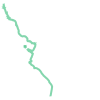

In [4]:
coastline_lat_long['geometry'][2]

In [5]:
# it's a dictionary, we'll use this as geojson :)
coastline_coords = mapping(coastline_lat_long['geometry'][2])
coastline_coords

{'type': 'MultiLineString',
 'coordinates': (((-117.12471993801229, 32.534272721308575),
   (-117.12469244969918, 32.533628399066814),
   (-117.12434015503115, 32.53294618750666),
   (-117.12414036923046, 32.53210141885253),
   (-117.12410598680846, 32.531413856403454),
   (-117.12409628349376, 32.53059728381952),
   (-117.12419555926814, 32.52931853659114),
   (-117.12416485235971, 32.52736321309341),
   (-117.1242513922651, 32.5261092928875),
   (-117.1243714712653, 32.52513032567057),
   (-117.12434144915025, 32.52504705398996),
   (-117.12432332847119, 32.5233802318002),
   (-117.12419189850901, 32.521409133995384),
   (-117.12416759358146, 32.51944483381188),
   (-117.12433118932508, 32.5145056932909),
   (-117.12410048362086, 32.5129905183002),
   (-117.12410798462571, 32.51128984706916),
   (-117.12466455536837, 32.51115396537142),
   (-117.12469572132994, 32.51102559626345),
   (-117.12477712166016, 32.510565335447225),
   (-117.1247827173223, 32.51047528316897),
   (-117.12477

In [6]:
# this is more like it
len((coastline_coords['coordinates'])[0])

3303

In [7]:
# convert to geojson
coastline_coords


{'type': 'MultiLineString',
 'coordinates': (((-117.12471993801229, 32.534272721308575),
   (-117.12469244969918, 32.533628399066814),
   (-117.12434015503115, 32.53294618750666),
   (-117.12414036923046, 32.53210141885253),
   (-117.12410598680846, 32.531413856403454),
   (-117.12409628349376, 32.53059728381952),
   (-117.12419555926814, 32.52931853659114),
   (-117.12416485235971, 32.52736321309341),
   (-117.1242513922651, 32.5261092928875),
   (-117.1243714712653, 32.52513032567057),
   (-117.12434144915025, 32.52504705398996),
   (-117.12432332847119, 32.5233802318002),
   (-117.12419189850901, 32.521409133995384),
   (-117.12416759358146, 32.51944483381188),
   (-117.12433118932508, 32.5145056932909),
   (-117.12410048362086, 32.5129905183002),
   (-117.12410798462571, 32.51128984706916),
   (-117.12466455536837, 32.51115396537142),
   (-117.12469572132994, 32.51102559626345),
   (-117.12477712166016, 32.510565335447225),
   (-117.1247827173223, 32.51047528316897),
   (-117.12477

In [8]:
state_county = gpd.read_file("./data/polygons/State_With_County_Boundaries/State_With_County_Boundaries.shp")
state_county_sd = state_county[state_county['NAME']=='SAN DIEGO'].reset_index(drop=True)
state_county_sd

,TYPE,ISLAND,WATER,LOCASE,COUNTY_ABB,COUNTY,COUNTY_COD,COUNTY_FIP,SANGIS_JUR,NAME,SHAPE_AREA,SHAPE_LEN,geometry
0,Land,Bay Islands,Misc Bay or Inlet,San Diego,SDG,37,37,073,0.0,SAN DIEGO,4024.951590,309.677525,"POLYGON ((272090.241 -591977.344, 272093.946 -..."
1,Land,Bay Islands,Misc Bay or Inlet,San Diego,SDG,37,37,073,0.0,SAN DIEGO,118.482483,52.740461,"POLYGON ((271441.482 -591890.031, 271438.836 -..."
2,Land,Bay Islands,Misc Bay or Inlet,San Diego,SDG,37,37,073,0.0,SAN DIEGO,3984.697899,294.514152,"POLYGON ((272033.091 -591824.944, 272036.531 -..."
3,Land,Bay Islands,Misc Bay or Inlet,San Diego,SDG,37,37,073,0.0,SAN DIEGO,183.692002,74.035167,"POLYGON ((271599.703 -591804.306, 271597.057 -..."
4,Land,Bay Islands,Misc Bay or Inlet,San Diego,SDG,37,37,073,0.0,SAN DIEGO,207.807686,64.588997,"POLYGON ((271955.304 -591715.935, 271952.922 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Land,Bay Islands,Misc Bay or Inlet,San Diego,SDG,37,37,073,0.0,SAN DIEGO,2857.307255,461.727386,"POLYGON ((271949.880 -595469.057, 271952.790 -..."
152,Land,Bay Islands,Misc Bay or Inlet,San Diego,SDG,37,37,073,0.0,SAN DIEGO,114163.450599,3298.788565,"POLYGON ((269610.032 -593972.835, 269587.543 -..."
153,Land,Bay Islands,Misc Bay or Inlet,San Diego,SDG,37,37,073,0.0,SAN DIEGO,28043.290141,1136.892468,"POLYGON ((271809.650 -592151.705, 271818.117 -..."
154,Land,Bay Islands,Misc Bay or Inlet,San Diego,SDG,37,37,073,0.0,SAN DIEGO,2809.564642,268.501273,"POLYGON ((271008.623 -592030.261, 271003.595 -..."


In [9]:
type(state_county_sd['geometry'][155])

shapely.geometry.polygon.Polygon

# water quality data

In [10]:
os.listdir()

['.DS_Store',
 'Ocean Water Quality.ipynb',
 'dse241 - project proposal - AH.pptx',
 '~$dse241 - project proposal - AH.pptx',
 'viz mockup.twb',
 '.ipynb_checkpoints',
 'data',
 'potential solutions.ipynb']

In [11]:
data_dict = pd.read_csv("./data/water_quality_dictionary_datasd.csv")
data_dict

,field,description,possible_values
0,sample,Unique sample ID,NaN
1,station,Unique location ID where sample was collected....,NaN
2,depth_m,Depth in meters,NaN
3,date_sample,Date sample was collected,NaN
4,time,Time sample was collected,NaN
5,project,Outfall region where sample was collected,PLOO (PL): Point Loma Ocean Outfall; SBOO: Sou...
6,parameter,Factor being recorded,fluorometry; DENSITY; DO; ENTERO; FECAL; OG; P...
7,qualifier,Qualifier for value,"<, >, e, LA, ND, NS"
8,value,Result value,NaN
9,units,Units of result value,%; C; CFU/100 ml; mg/L; pH; ppt; sigma-t; ug/L


In [12]:
data_dict.iloc[6,2]

'fluorometry; DENSITY; DO; ENTERO; FECAL; OG; PH; SALINITY; SUSO; TEMP; TOTAL; pct_light'

In [13]:
locs = pd.read_csv("./data/reference_stations_water_quality.csv")
locs

,station,lat,long
0,I25,32.56117,-117.14800
1,I26,32.57450,-117.14700
2,S10,32.54330,-117.12500
3,S11,32.56130,-117.13200
4,S4,32.53530,-117.12500
...,...,...,...
152,B6,32.82833,-117.29250
153,A3,32.65167,-117.29717
154,A4,32.68450,-117.30700
155,A15,32.66833,-117.28167


In [14]:
data = pd.read_csv("./data/water_quality_2020_2021_datasd.csv")
data

,sample,station,depth_m,date_sample,time,project,parameter,qualifier,value,units
0,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,ENTERO,e,220.0,CFU/100 mL
1,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,TOTAL,NR,NaN,CFU/100 mL
2,2001018683,S11,NaN,2020-01-01,9:18:00 PST,SBOO,FECAL,NR,NaN,CFU/100 mL
3,2001018680,S4,NaN,2020-01-01,NaN,SBOO,TOTAL,NS,NaN,CFU/100 mL
4,2001018680,S4,NaN,2020-01-01,NaN,SBOO,FECAL,NS,NaN,CFU/100 mL
...,...,...,...,...,...,...,...,...,...,...
70158,2112291249,D8-B,NaN,2021-12-29,9:36:00 PST,PLOO,ENTERO,e,14.0,CFU/100 mL
70159,2112291249,D8-B,NaN,2021-12-29,9:36:00 PST,PLOO,TOTAL,<,200.0,CFU/100 mL
70160,2112291250,D9,NaN,2021-12-29,9:22:00 PST,PLOO,FECAL,<,2.0,CFU/100 mL
70161,2112291250,D9,NaN,2021-12-29,9:22:00 PST,PLOO,ENTERO,e,4.0,CFU/100 mL


In [15]:
data.nunique()

sample         15333
station          104
depth_m           16
date_sample      369
time             383
project            2
parameter         10
qualifier          7
value           8190
units              8
dtype: int64

In [16]:
data['station'].nunique()

104

In [17]:
pd.to_datetime(data['date_sample']).min()

Timestamp('2020-01-01 00:00:00')

In [18]:
pd.to_datetime(data['date_sample']).max()

Timestamp('2021-12-29 00:00:00')

In [19]:
# get San Diego county fips

# first state fips
# from US Census site
url = "https://www2.census.gov/programs-surveys/popest/geographies/2021/state-geocodes-v2021.xlsx"
state_df = pd.read_excel(url, skiprows=5)

# get just california state fips
cali_df = state_df[state_df['Name'] == 'California']

# returns an integer
cali_fip = cali_df['State (FIPS)'].values[0]
# format as two digit str
cali_fip = str(cali_fip).zfill(2)
cali_fip

/Users/ah/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


'06'

In [20]:
# now get the county fips
url = "https://www2.census.gov/programs-surveys/popest/geographies/2021/all-geocodes-v2021.xlsx"
county_df = pd.read_excel(url, skiprows=4)

# specifically we want san diego
# first rename that long annoying string
cols = county_df.columns
county_df = county_df.rename(columns={cols[-1]:'area_name'})
# returns an integer
sd_fip = county_df[county_df['area_name'] == 'San Diego County']['County Code (FIPS)'].values[0]
# format as three digit str
sd_fip = str(sd_fip).zfill(3)
sd_fip

'073'

In [21]:
ca_sd_fip = cali_fip + sd_fip
ca_sd_fip

'06073'

In [22]:
# get all county bounds
# we'll filter to just san diego later

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

    
# just california
target_states = ['06']
counties['features'] = [f for f in counties['features'] if f['properties']['STATE'] in target_states]

# and now just san diego
target_counties = [sd_fip]
counties['features'] = [f for f in counties['features'] if f['properties']['COUNTY'] in target_counties]

counties

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'GEO_ID': '0500000US06073',
    'STATE': '06',
    'COUNTY': '073',
    'NAME': 'San Diego',
    'LSAD': 'County',
    'CENSUSAREA': 4206.63},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-116.106159, 32.618328],
      [-116.390091, 32.59602],
      [-117.118865, 32.534661],
      [-117.124862, 32.534156],
      [-117.133363, 32.575625],
      [-117.132963, 32.597054],
      [-117.136664, 32.618754],
      [-117.139464, 32.627054],
      [-117.159865, 32.660652],
      [-117.168866, 32.671952],
      [-117.180366, 32.681652],
      [-117.192967, 32.687751],
      [-117.196767, 32.688851],
      [-117.213068, 32.687751],
      [-117.223868, 32.683051],
      [-117.236239, 32.671353],
      [-117.246069, 32.669352],
      [-117.255169, 32.700051],
      [-117.25757, 32.72605],
      [-117.25537, 32.745449],
      [-117.25257, 32.752949],
      [-117.25497, 32.786948],
      [-117.26107, 32.80314

In [25]:
coastline_lat_long

,SD,geometry
0,0,"LINESTRING (-119.76993 34.41035, -119.76976 34..."
1,1,"MULTILINESTRING ((-117.59618 33.38712, -117.59..."
2,0,"MULTILINESTRING ((-117.12472 32.53427, -117.12..."


In [26]:
coastline_coords

{'type': 'MultiLineString',
 'coordinates': (((-117.12471993801229, 32.534272721308575),
   (-117.12469244969918, 32.533628399066814),
   (-117.12434015503115, 32.53294618750666),
   (-117.12414036923046, 32.53210141885253),
   (-117.12410598680846, 32.531413856403454),
   (-117.12409628349376, 32.53059728381952),
   (-117.12419555926814, 32.52931853659114),
   (-117.12416485235971, 32.52736321309341),
   (-117.1242513922651, 32.5261092928875),
   (-117.1243714712653, 32.52513032567057),
   (-117.12434144915025, 32.52504705398996),
   (-117.12432332847119, 32.5233802318002),
   (-117.12419189850901, 32.521409133995384),
   (-117.12416759358146, 32.51944483381188),
   (-117.12433118932508, 32.5145056932909),
   (-117.12410048362086, 32.5129905183002),
   (-117.12410798462571, 32.51128984706916),
   (-117.12466455536837, 32.51115396537142),
   (-117.12469572132994, 32.51102559626345),
   (-117.12477712166016, 32.510565335447225),
   (-117.1247827173223, 32.51047528316897),
   (-117.12477

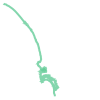

In [35]:
coastline_lat_long['geometry'][1]

In [67]:
# might need to replace all the tuples as lists
list(coastline_coords['coordinates'][0])

[(-117.12471993801229, 32.534272721308575),
 (-117.12469244969918, 32.533628399066814),
 (-117.12434015503115, 32.53294618750666),
 (-117.12414036923046, 32.53210141885253),
 (-117.12410598680846, 32.531413856403454),
 (-117.12409628349376, 32.53059728381952),
 (-117.12419555926814, 32.52931853659114),
 (-117.12416485235971, 32.52736321309341),
 (-117.1242513922651, 32.5261092928875),
 (-117.1243714712653, 32.52513032567057),
 (-117.12434144915025, 32.52504705398996),
 (-117.12432332847119, 32.5233802318002),
 (-117.12419189850901, 32.521409133995384),
 (-117.12416759358146, 32.51944483381188),
 (-117.12433118932508, 32.5145056932909),
 (-117.12410048362086, 32.5129905183002),
 (-117.12410798462571, 32.51128984706916),
 (-117.12466455536837, 32.51115396537142),
 (-117.12469572132994, 32.51102559626345),
 (-117.12477712166016, 32.510565335447225),
 (-117.1247827173223, 32.51047528316897),
 (-117.12477022575803, 32.510360279659935),
 (-117.12477435276895, 32.51028569798598),
 (-117.12480

In [58]:
# make a copy to play with
countiez = counties.copy()
countiez

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'GEO_ID': '0500000US06073',
    'STATE': '06',
    'COUNTY': '073',
    'NAME': 'San Diego',
    'LSAD': 'County',
    'CENSUSAREA': 4206.63},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-116.106159, 32.618328],
      [-116.390091, 32.59602],
      [-117.118865, 32.534661],
      [-117.124862, 32.534156],
      [-117.133363, 32.575625],
      [-117.132963, 32.597054],
      [-117.136664, 32.618754],
      [-117.139464, 32.627054],
      [-117.159865, 32.660652],
      [-117.168866, 32.671952],
      [-117.180366, 32.681652],
      [-117.192967, 32.687751],
      [-117.196767, 32.688851],
      [-117.213068, 32.687751],
      [-117.223868, 32.683051],
      [-117.236239, 32.671353],
      [-117.246069, 32.669352],
      [-117.255169, 32.700051],
      [-117.25757, 32.72605],
      [-117.25537, 32.745449],
      [-117.25257, 32.752949],
      [-117.25497, 32.786948],
      [-117.26107, 32.80314

In [68]:
# this is the layer I want to replace
# give it a shot!
countiez['features'][0]['geometry']['coordinates'][0] = list(coastline_coords['coordinates'][0])
countiez

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'GEO_ID': '0500000US06073',
    'STATE': '06',
    'COUNTY': '073',
    'NAME': 'San Diego',
    'LSAD': 'County',
    'CENSUSAREA': 4206.63},
   'geometry': {'type': 'Polygon',
    'coordinates': [[(-117.12471993801229, 32.534272721308575),
      (-117.12469244969918, 32.533628399066814),
      (-117.12434015503115, 32.53294618750666),
      (-117.12414036923046, 32.53210141885253),
      (-117.12410598680846, 32.531413856403454),
      (-117.12409628349376, 32.53059728381952),
      (-117.12419555926814, 32.52931853659114),
      (-117.12416485235971, 32.52736321309341),
      (-117.1242513922651, 32.5261092928875),
      (-117.1243714712653, 32.52513032567057),
      (-117.12434144915025, 32.52504705398996),
      (-117.12432332847119, 32.5233802318002),
      (-117.12419189850901, 32.521409133995384),
      (-117.12416759358146, 32.51944483381188),
      (-117.12433118932508, 32.5145056932909),
      

In [72]:
import plotly
plotly.__version__

'5.9.0'

In [56]:
counties['features'][0]['geometry']['coordinates'][0]

[[-116.106159, 32.618328],
 [-116.390091, 32.59602],
 [-117.118865, 32.534661],
 [-117.124862, 32.534156],
 [-117.133363, 32.575625],
 [-117.132963, 32.597054],
 [-117.136664, 32.618754],
 [-117.139464, 32.627054],
 [-117.159865, 32.660652],
 [-117.168866, 32.671952],
 [-117.180366, 32.681652],
 [-117.192967, 32.687751],
 [-117.196767, 32.688851],
 [-117.213068, 32.687751],
 [-117.223868, 32.683051],
 [-117.236239, 32.671353],
 [-117.246069, 32.669352],
 [-117.255169, 32.700051],
 [-117.25757, 32.72605],
 [-117.25537, 32.745449],
 [-117.25257, 32.752949],
 [-117.25497, 32.786948],
 [-117.26107, 32.803148],
 [-117.280971, 32.822247],
 [-117.28217, 32.839547],
 [-117.28117, 32.843047],
 [-117.27387, 32.851447],
 [-117.26497, 32.848947],
 [-117.26067, 32.852647],
 [-117.25617, 32.859447],
 [-117.25167, 32.874346],
 [-117.25447, 32.900146],
 [-117.26047, 32.931245],
 [-117.262547, 32.939542],
 [-117.28077, 33.012343],
 [-117.29337, 33.034642],
 [-117.309771, 33.07454],
 [-117.315278, 33.09

In [69]:
fig = go.Figure(data=go.Scattergeo(
    geojson=countiez, # set the map bounds
    lon = locs['long'],
    lat = locs['lat'],
    text = locs['station'],
    mode = 'markers'
))
fig.show()

In [71]:
fig = go.Figure(data=go.Scattergeo(
    geojson=countiez, # set the map bounds
    lon = locs['long'],
    lat = locs['lat'],
    text = locs['station'],
    mode = 'markers'
))

fig.update_geos(
    #resolution=110,
    fitbounds='locations', visible=False, # starts map zoom to just data points 
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=False, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showlakes=False, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    showcountries=True,countrycolor="RebeccaPurple",
    #center={"lat": 32.786670, "lon": -117.238620}, # crown point
)

fig.update_layout(
    title = 'MVP',
    #geo_scope='usa', # this excludes mexico
    geo_scope='north america', # need to get this to just san diego somehow
    height=1000,
    margin={"r":0,"t":0,"l":0,"b":0},
)

fig.show()

# MVP
create a scatter/point plot of the measurement locations

In [15]:
locs.head(1)

,station,lat,long
0,I25,32.56117,-117.148


In [17]:
px.set_mapbox_access_token?

In [30]:
go.Scattergeo?

In [70]:
fig = go.Figure(data=go.Scattergeo(
    geojson=counties, # set the map bounds
    lon = locs['long'],
    lat = locs['lat'],
    text = locs['station'],
    mode = 'markers'
))

fig.update_geos(
    #resolution=110,
    fitbounds='locations', visible=False, # starts map zoom to just data points 
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=False, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showlakes=False, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    showcountries=True,countrycolor="RebeccaPurple",
    #center={"lat": 32.786670, "lon": -117.238620}, # crown point
)

fig.update_layout(
    title = 'MVP',
    #geo_scope='usa', # this excludes mexico
    geo_scope='north america', # need to get this to just san diego somehow
    height=1000,
    margin={"r":0,"t":0,"l":0,"b":0},
)

fig.show()